In [10]:
%pip install scikit-surprise


  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: still running...
  Running setup.py install for scikit-surprise: still running...
  Running setup.py install for scikit-surprise: still running...
  Running setup.py install for scikit-surprise: finished with status 'done'


  DEPRECATION: scikit-surprise is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "install gradio" - maybe you meant "install"



In [13]:
%pip install gradio

  DEPRECATION: ffmpy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559



     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.8 MB 1.7 MB/s eta 0:00:09
      --------------------------------------- 0.3/15.8 MB 2.3 MB/s eta 0:00:07
     ---- ----------------------------------- 1.6/15.8 MB 3.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.7/15.8 MB 2.5 MB/s eta 0:00:06
     ---- ----------------------------------- 1.9/15.8 MB 2.1 MB/s eta 0:00:07
     ----- ---------------------------------- 2.0/15.8 MB 2.1 MB/s eta 0:00:07
     ----- ---------------------------------- 2.3/15.8 MB 1.9 MB/s eta 0:00:08
     ------ --------------------------------- 2.6/15.8 MB 1.9 MB/s eta 0:00:08
     ------- -------------------------------- 2.9/15.8 MB 1.8 MB/s eta 0:00:08
     -------- ------------------------------- 3.4/15.8 MB 2.0 MB/s eta 0:00:07
     --------- ------------------------------ 3.8/15.8 MB 2.2 MB/s eta 0:00:06
     ---------- ----------------------------- 4.3/15.8 MB 

In [2]:
import pandas as pd
import missingno as msno

In [3]:
df_ML=pd.read_csv('datasets/ML.csv')
df_ML.head()

,Unnamed: 0,id,duration_int,duration_type,platform,rating,type,release_year,movieId,userId,score
0,0,as1,113.0,min,amazon,g,movie,2014,as1,543,5.0
1,1,as1,113.0,min,amazon,g,movie,2014,as1,595,3.0
2,2,as1,113.0,min,amazon,g,movie,2014,as1,611,3.0
3,3,as1,113.0,min,amazon,g,movie,2014,as1,2523,3.5
4,4,as1,113.0,min,amazon,g,movie,2014,as1,3082,4.0


<Axes: >

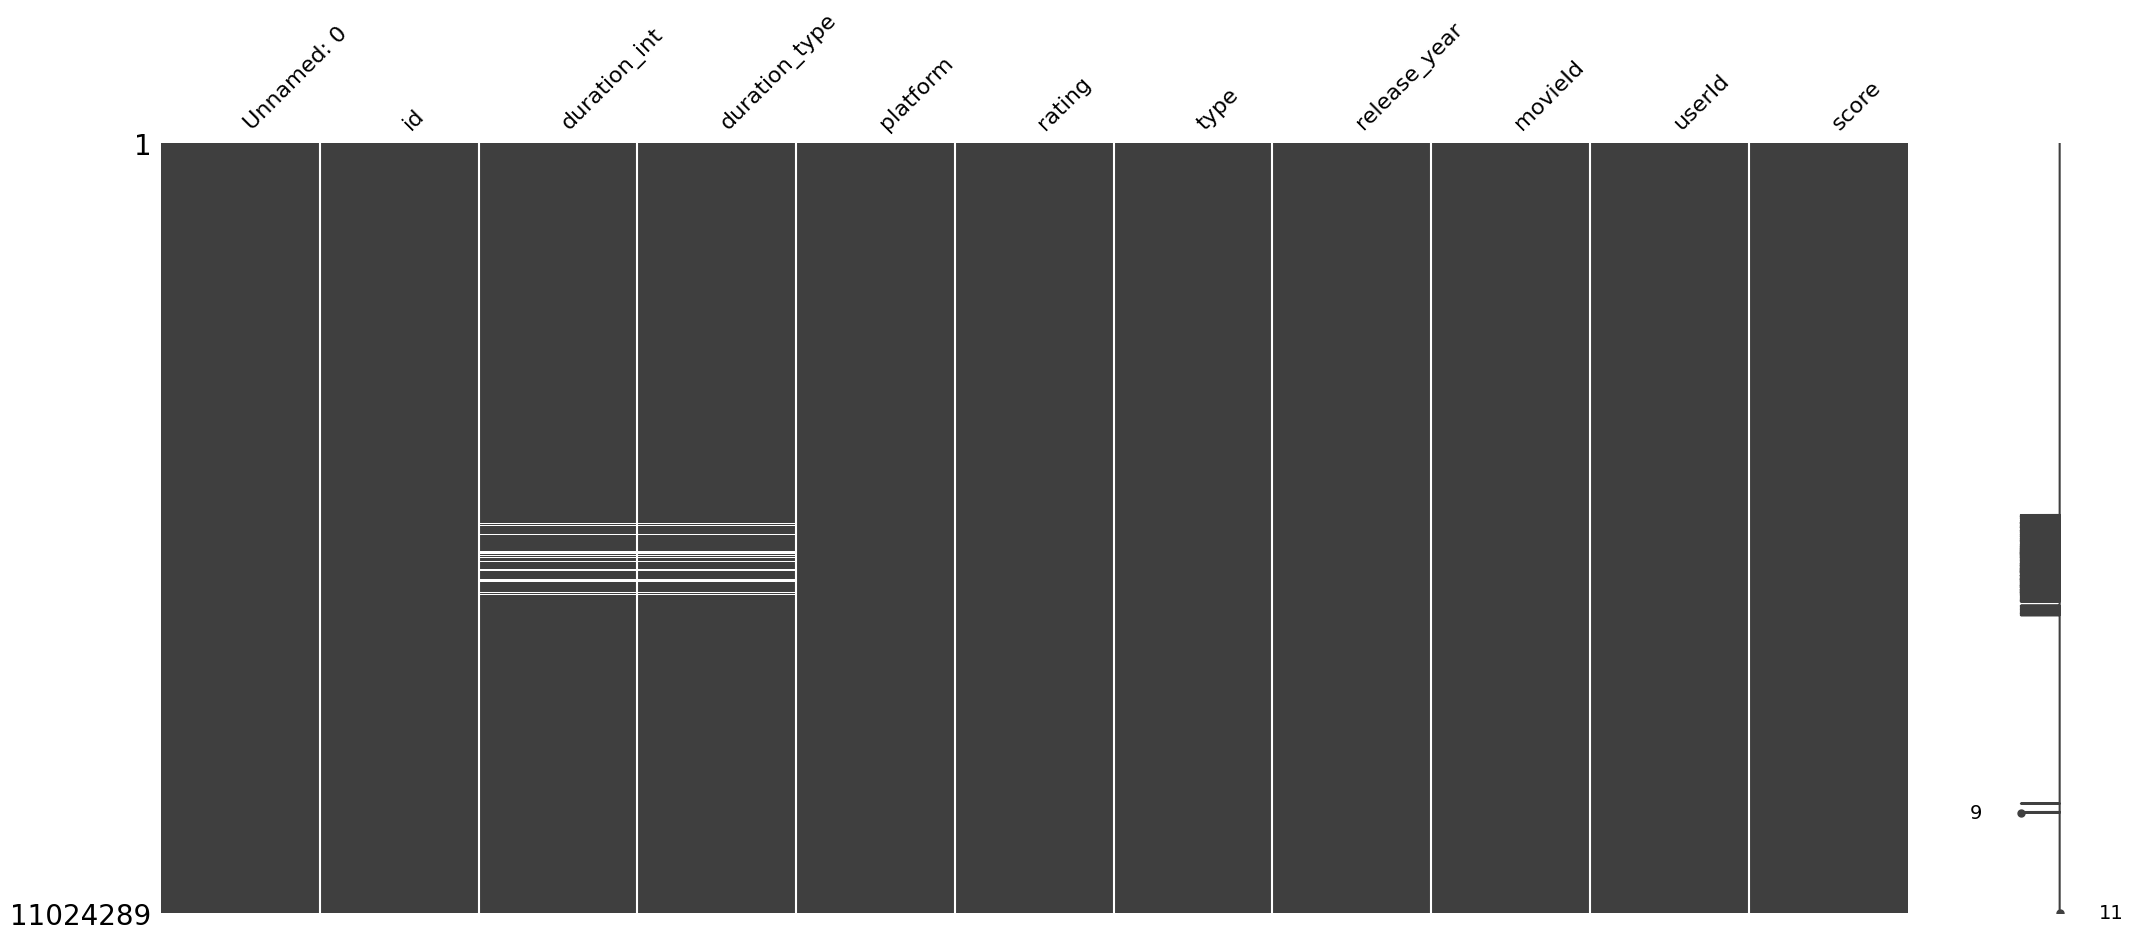

In [19]:
msno.matrix(df_ML)

In [4]:
df_ML['duration_type'].fillna('min', inplace=True)
df_ML['duration_int'].fillna(0, inplace=True)

In [5]:
df_ML.isnull().sum()

Unnamed: 0       0
id               0
duration_int     0
duration_type    0
platform         0
rating           0
type             0
release_year     0
movieId          0
userId           0
score            0
dtype: int64

In [30]:
mask= df_ML['score']<0
df_ML[mask]

,Unnamed: 0,id,duration_int,duration_type,platform,rating,type,release_year,movieId,userId,score


In [6]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   id             object 
 2   duration_int   float64
 3   duration_type  object 
 4   platform       object 
 5   rating         object 
 6   type           object 
 7   release_year   int64  
 8   movieId        object 
 9   userId         int64  
 10  score          float64
dtypes: float64(2), int64(3), object(6)
memory usage: 925.2+ MB


In [11]:
df_ML['duration_int']=df_ML['duration_int'].astype('int64')

<h1>Modelo de Predicción</h1>

In [12]:
from surprise import Dataset, Reader, SVD 

In [14]:
from surprise.model_selection import train_test_split

In [114]:
limit_F = 500000 

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(df_ML[['userId', 'movieId', 'score']][:limit_F], reader)

trainset, testset = train_test_split(data, test_size=.25)

In [115]:
modelo = SVD()

modelo.fit(trainset)

In [116]:
predictions = modelo.test(testset)

predictions[1]

Prediction(uid=74945, iid='as370', r_ui=4.0, est=3.661113806539678, details={'was_impossible': False})

In [117]:
modelo.predict(154,'as680')

Prediction(uid=154, iid='as680', r_ui=None, est=3.5274267411556246, details={'was_impossible': False})

In [118]:
user = 33829
rating = 4   
df_user = df_ML[(df_ML.userId == user) & (df_ML.score >= rating)]
df_user = df_user.reset_index(drop=True)

df_print=pd.read_csv('datasets/plataformas_unique.csv')

df_user = pd.merge(df_user, df_print[['id', 'title']], on='id', how='left')
df_user[['id', 'title', 'score']].head()

,id,title,score
0,as642,the glory is gone,5.0
1,as2190,hope lost,4.0
2,as2386,garfield specials,4.0
3,as3353,afsos,5.0
4,as3522,15-minute upper body sculpt 2.0 workout,5.0


In [119]:
df_print = df_print[['id', 'title']]
rec_usuario = df_print.iloc[:4499].copy()

In [120]:
user_vistas = df_ML[df_ML['userId'] == user]
rec_usuario = rec_usuario[~rec_usuario['id'].isin(user_vistas['id'])]

In [121]:
rec_usuario['Estimate_Score'] = rec_usuario['id'].apply(lambda x: modelo.predict(user, x).est)

rec_usuario = rec_usuario.sort_values('Estimate_Score', ascending=False)
rec_usuario.head(10)

,id,title,Estimate_Score
624,as625,the hero,4.354857
248,as249,turquoise fever,4.288847
842,as843,supersize vs superskinny,4.252598
277,as278,tour balas perdidas en madrid,4.231757
978,as979,sky racket,4.224168
192,as193,venky mama,4.209143
417,as418,the toothbrush family,4.204539
411,as412,the tunnel,4.177022
956,as957,so undercover,4.167429
808,as809,tayo the little bus,4.158496


In [122]:
def rec_movie(userId, movieId):
    
    predict = modelo.predict(userId, str(movieId))
    
    if predict.est >= 3.6:
        return "Recomendada", predict.est
    else:
        return "No recomendada", predict.est

In [123]:
rec_movie(666,'as181')

('Recomendada', 3.687039377207868)

In [124]:
rec_movie(666,'ns69')

('No recomendada', 3.5342933333333333)

In [125]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 1.0204


1.020412916031319

In [126]:
from surprise.model_selection import cross_validate
import numpy as np

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128]

for factor in factores:
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 4, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    1.0021  1.0024  1.0033  1.0016  1.0023  0.0006  
Fit time          12.39   12.62   12.41   12.54   12.49   0.09    
Test time         12.52   12.38   7.72    8.24    10.22   2.24    
Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    1.0048  1.0018  0.9994  1.0048  1.0027  0.0022  
Fit time          11.90   12.47   13.12   12.32   12.45   0.44    
Test time         12.62   16.81   13.09   10.60   13.28   2.24    
Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    1.0030  1.0068  1.0015  1.0020  1.0033  0.0021  
Fit time          13.36   14.08   14.54   14.47   14.11   0.47    
Test time         9.79    8.75    16.53   13.99   12.26   3.15    
Evaluating RMSE of algorithm SVD on 4 split(s).



<h1>Interfaz Gráfica</h1>

In [131]:
def rec_movietitle(userId, movieId):
    recomendado, puntaje = rec_movie(userId, movieId)
    titulo_1 = df_print[df_print.id == movieId].title.iloc[0].title()
    return (recomendado, puntaje,titulo_1)

In [134]:
rec_movietitle(369, 'as992')

('Recomendada', 3.744696004612851, 'Sing-Along-Songs For Kids')

In [135]:
import gradio as gr

c:\Users\yesen\Desktop\Henry\From_Henry\PI_ML_OPS\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [139]:
title = str("Las Mejores Recomendaciones de películas y series")
with gr.Blocks(title=title) as demo:
    nro_usuario = gr.inputs.Number(label='Ingrese el número de usuario: ')
    peli = gr.Textbox(label='Ingrese el id de la película: ')
    recomendacion = gr.Button('PUSH')
    title = gr.Textbox(label='La pelicula es: ')
    output = gr.Textbox(label= '¿Se la recomendamos? ')
    score = gr.Textbox(label='Nivel de afinidad basada en sus gustos(0-5): ')
    recomendacion.click(fn = rec_movietitle, inputs=[nro_usuario,peli], outputs=[output, score,title])
demo.launch(share = True)

c:\Users\yesen\Desktop\Henry\From_Henry\PI_ML_OPS\env\Lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\yesen\Desktop\Henry\From_Henry\PI_ML_OPS\env\Lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
